#We are going to predict the price of Gold (Commodity) on the basis of SPX, USO,SLV, EUR/USD price

In [ ]:
from google.colab import files
# Upload the dataset file
uploaded = files.upload()

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
commodity = pd.read_csv('gld_price_data.csv')
commodity.shape

(2290, 6)

In [5]:
commodity.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
for col in commodity.select_dtypes(include='object').columns:
    print(col)
    print(commodity[col].unique())

Date
['1/2/2008' '1/3/2008' '1/4/2008' ... '5/10/2018' '5/14/2018' '5/16/2018']


In [7]:
commodity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# Finding Missing Value
features_na = [features for features in commodity.columns if commodity[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(commodity[feature].isnull().mean(), 4),'% missing values')
else:
    print('No missing value found')

No missing value found


In [9]:
# Printing One Value
for column in commodity.columns:
    print(column, commodity[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [10]:
# Non-Numerical Categorical Feature
categorical_feature = [feature for feature in commodity.columns if ((commodity[feature].dtypes == 'O') & (feature not in ['GLD']))]
categorical_feature

['Date']

In [12]:
for feature in categorical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(commodity[feature].unique())))

The feature is Date and number of categories are 2290


In [13]:
numerical_features = [feature for feature in commodity.columns if ((commodity[feature].dtypes !='O') & (feature not in ['GLD']))]
numerical_features

['SPX', 'USO', 'SLV', 'EUR/USD']

In [14]:
commodity[numerical_features].head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [15]:
# Find the Discrete value
discrete_feature = [feature for feature in numerical_features if len(commodity[feature].unique())<25]
print('Discrete value count: {}'.format(len(discrete_feature)))

Discrete value count: 0


In [16]:
# Finding Continuous Numerical Feature
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['GLD']]
print('Continuous feature count: {}'.format(len(continuous_features)))

Continuous feature count: 4


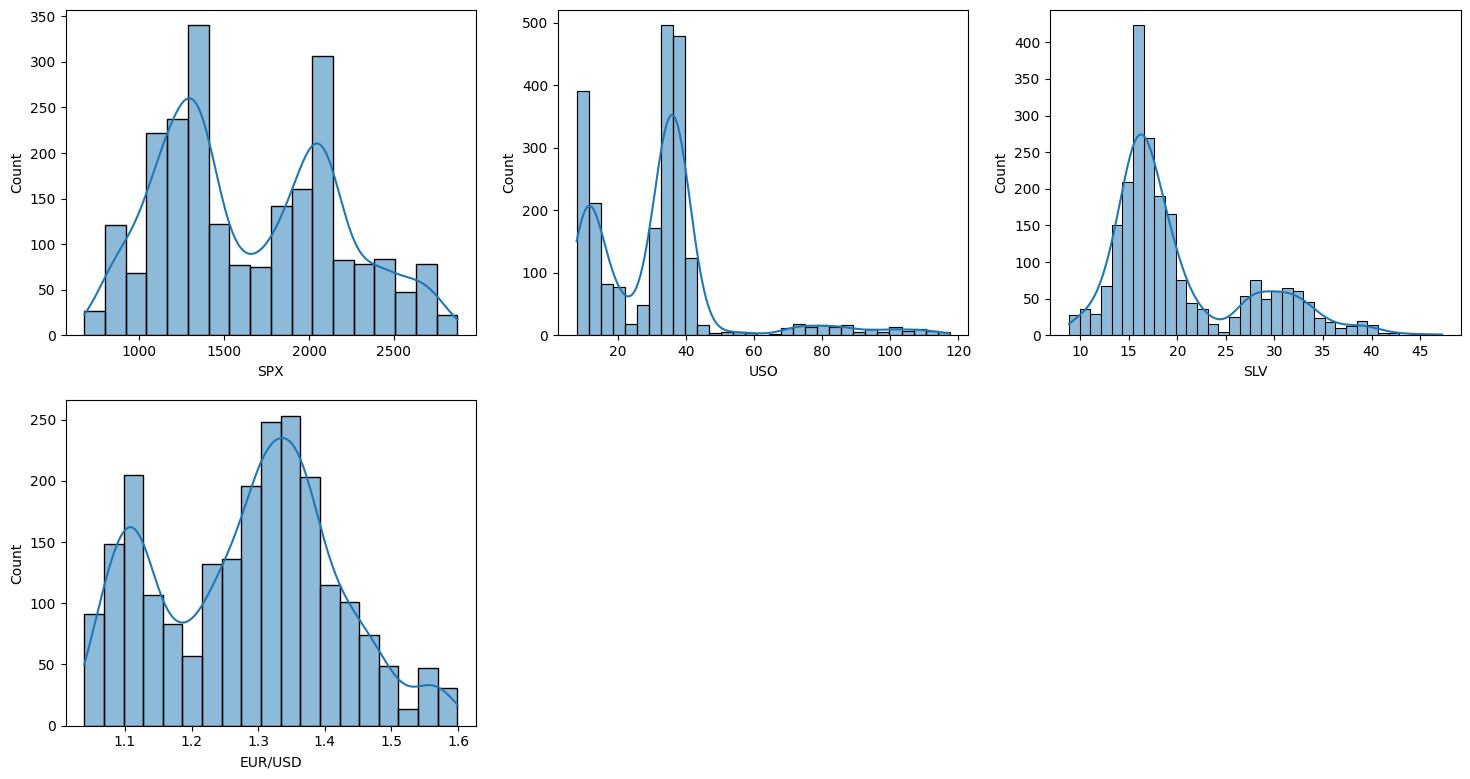

In [17]:
# Graph using Continuous Numerical
plt.figure(figsize=(18,60), facecolor='white')
plotnumber = 1
for continuous_feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.histplot(commodity[continuous_feature], kde=True)
    plt.xlabel(continuous_feature)
   # ax.remove()
    plotnumber+=1
plt.show()


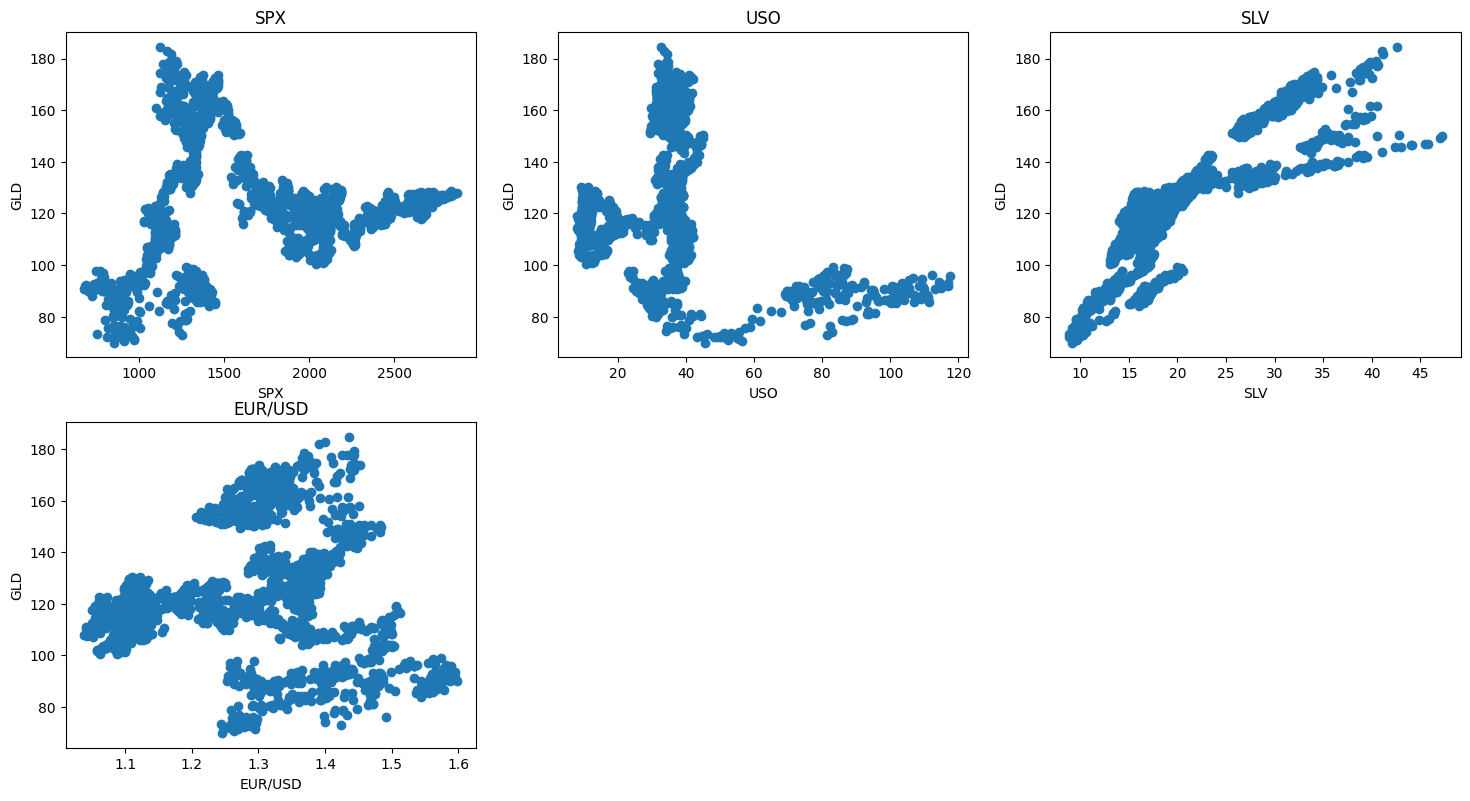

In [19]:
# Relation between Continuous Numerical Feature and Labels
plt.figure(figsize=(18,60), facecolor='white')
plotnumber = 1
for feature in continuous_features:
    data = commodity.copy()
    ax = plt.subplot(12, 3, plotnumber)
    plt.scatter(data[feature], data['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plt.title(feature)
   # ax.remove()
    plotnumber+=1
plt.show()

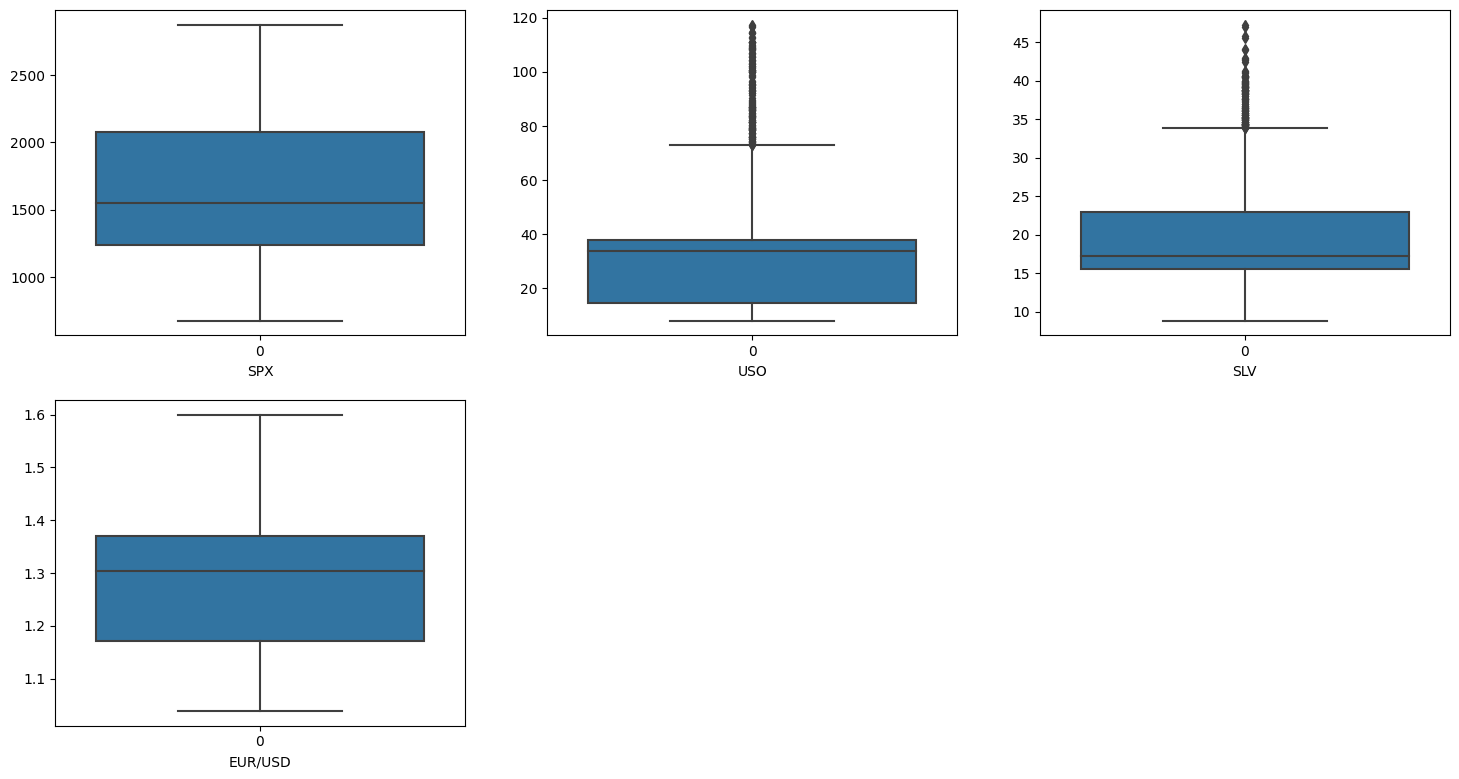

In [20]:
# Find the Outliers in the numerical_feature
plt.figure(figsize=(18,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(commodity[numerical_feature])
    plt.xlabel(numerical_feature)
   # ax.remove()
    plotnumber+=1
plt.show()

In [21]:
commodity.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [22]:
commodity = commodity.drop('Date', axis=1)

In [23]:
commodity.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [24]:
# Correlation Value
correlation =commodity.corr()

<Axes: >

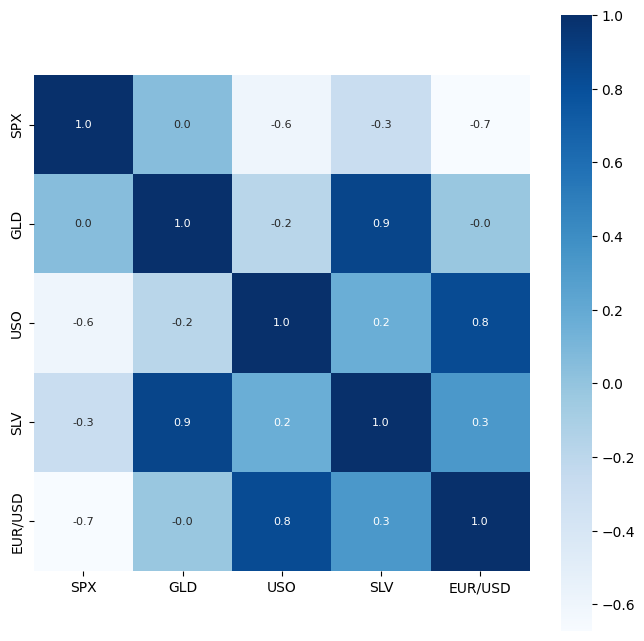

In [25]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, square=True, cbar=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [26]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


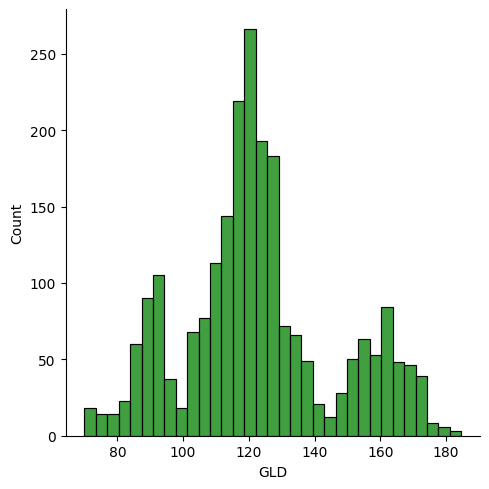

In [27]:
# Commodity Price Distribution
sns.displot(commodity['GLD'], color='green')

In [28]:
commodity.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [29]:
# Spliting the Feature and Target Avlues
X = commodity.drop(['GLD'], axis=1)
Y = commodity['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [30]:
# Spliting the data into Training and Testing values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)
print(len(X_train))
print(len(X_test))

1832
458


## ***Model Selection***

We will use Scikit-Learn to do the Model Selection for our Dataset

In [31]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [32]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def find_best_model_using_gridsearchcv(X, Y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'RandomForestRegressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100, 130],
                'max_depth': range(2, 4, 1),
                'criterion': ['friedman_mse', 'absolute_error', 'squared_error', 'poisson'],
                'max_features': ['best', 'log2']
            }
        },
        'XGBRegressor': {
            'model': XGBRegressor(),
            'params': {
                'learning_rate': [0.5, 0.1, 0.01, 0.001],
                'max_depth': [2, 3],
                'n_estimators': [10, 50, 100, 200]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [34]:
pd.set_option('display.max_colwidth', 100)
print("Before function call")
find_best_model_using_gridsearchcv(X, Y)
print("After function call")


Before function call


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

KeyboardInterrupt: 

## Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, Y_train)

In [ ]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

In [ ]:
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

In [ ]:
# Comparing the Actual and Predicted Value
Y_test = list(Y_test)

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actal vs predicted value')
plt.xlabel('Number of value')
plt.ylabel('gold')
plt.legend()
plt.show()

Conclusion: